In [473]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2.1. 
Réaliser un graphique avec deux axes. L'axe des abscisses va de 0 à 50 et s'intitule "Axe des x". L'axe des ordonnées s'intitule "Axe des y".Tracer la droite d'équation : x = 3y. Avec x allant de 0 à 50.Le graphe possède le titre suivant "Tracer une droite" et la droite est de couleur rouge.

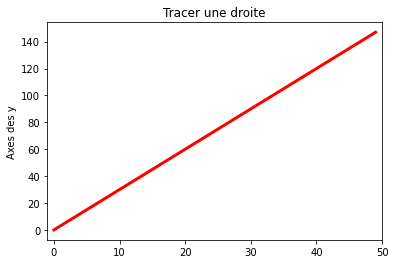

In [474]:
f = lambda x: x*3
x = [ f(x) for x in range(0,50)]
fig = plt.figure()
ax = fig.add_subplot()
plt.xlim(-1,50)
ax.plot([f(x) for x in range(50)], color='red', linewidth=3);
ax.set_ylabel('Axes des y')  # Add a y-label to the axes.
ax.set_title('Tracer une droite')
plt.show()

2.2.-Pour les graphes suivants, tu peux télécharger le fichier des ventes 2020 d'une entreprise de cosmétiques ici.
En premier lieu, nous souhaitons un graphe qui donne la courbe du profit total réalisé chaque mois.

In [475]:
df = pd.read_csv("company_sales_data.csv")

In [476]:
df # Apercu du dataset

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


In [477]:
df.isnull().sum() # Vérifier les valeurs manquantes

month_number    0
facecream       0
facewash        0
toothpaste      0
bathingsoap     0
shampoo         0
moisturizer     0
total_units     0
total_profit    0
dtype: int64

In [478]:
df.duplicated().sum()# Vérifier les colonnes dupliquées

0

In [479]:
df.month_number # Vérifier les mois avant de les renommer

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
Name: month_number, dtype: int64

In [480]:
# Cette fonction permet de remplacer les chiffres par les mois
df["month_number_rename"] = df["month_number"].apply(lambda x: 'Jan' if x==1
                                              else 'Feb'if x == 2
                                              else 'Mar' if x == 3
                                              else 'Apr' if x == 4
                                              else 'May' if x == 5
                                              else 'June' if x == 6
                                              else 'July' if x == 7
                                              else 'Aug' if x == 8
                                              else 'Sep' if x == 9
                                              else 'Oct' if x == 10
                                              else 'Nov' if x == 11
                                              else 'Dec')

In [481]:
df

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit,month_number_rename
0,1,2500,1500,5200,9200,1200,1500,21100,211000,Jan
1,2,2630,1200,5100,6100,2100,1200,18330,183300,Feb
2,3,2140,1340,4550,9550,3550,1340,22470,224700,Mar
3,4,3400,1130,5870,8870,1870,1130,22270,222700,Apr
4,5,3600,1740,4560,7760,1560,1740,20960,209600,May
5,6,2760,1555,4890,7490,1890,1555,20140,201400,June
6,7,2980,1120,4780,8980,1780,1120,29550,295500,July
7,8,3700,1400,5860,9960,2860,1400,36140,361400,Aug
8,9,3540,1780,6100,8100,2100,1780,23400,234000,Sep
9,10,1990,1890,8300,10300,2300,1890,26670,266700,Oct


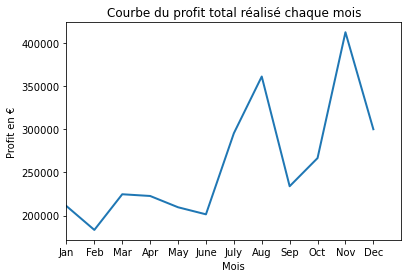

In [482]:
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(df.month_number_rename,df.total_profit,linewidth=2)
ax.set(xlim=[0, 12])
plt.title("Courbe du profit total réalisé chaque mois")
ax.set_ylabel('Profit en €') 
ax.set_xlabel('Mois')
plt.show() # affiche la figure a l'ecran

2.3.-Ensuite, nous souhaitons un graphe qui donne la courbe de profit pour chaque produit, en fonction du temps.
Chaque courbe aura une couleur différente et nous souhaitons une légende qui indique quelle couleur correspond à quel produit.

In [483]:
df.columns

Index(['month_number', 'facecream', 'facewash', 'toothpaste', 'bathingsoap',
       'shampoo', 'moisturizer', 'total_units', 'total_profit',
       'month_number_rename'],
      dtype='object')

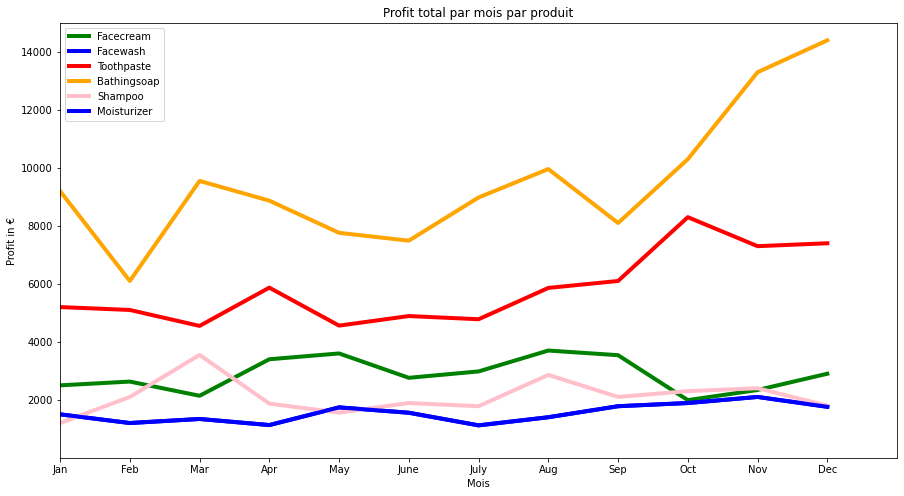

In [484]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
plt.plot(df.month_number_rename,df.facecream, color="green",linewidth=4,label ='Facecream') 
plt.plot(df.month_number_rename,df.facewash, color="blue",linewidth =4,label = 'Facewash') 
plt.plot(df.month_number_rename,df.toothpaste, color="red",linewidth =4,label ='Toothpaste')
plt.plot(df.month_number_rename,df.bathingsoap, color = 'orange',linewidth =4,label = 'Bathingsoap')
plt.plot(df.month_number_rename,df.shampoo, color = 'pink',linewidth =4,label = 'Shampoo')
plt.plot(df.month_number_rename, df.moisturizer, color='blue',linewidth =4,label = 'Moisturizer')
plt.legend()
ax.set(xlim=[0, 12],ylim=[1,15000])
ax.set(title='Profit total par mois par produit', ylabel='Profit in €', xlabel='Mois')
plt.show()

2.4. Graphe 4
Nous souhaitons un graphe qui compare, chaque mois, le nombre d'unités vendus pour chaque produit. A vous de choisir la meilleure représentation pour connaître le produit le plus vendu par mois.

In [485]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   month_number         12 non-null     int64 
 1   facecream            12 non-null     int64 
 2   facewash             12 non-null     int64 
 3   toothpaste           12 non-null     int64 
 4   bathingsoap          12 non-null     int64 
 5   shampoo              12 non-null     int64 
 6   moisturizer          12 non-null     int64 
 7   total_units          12 non-null     int64 
 8   total_profit         12 non-null     int64 
 9   month_number_rename  12 non-null     object
dtypes: int64(9), object(1)
memory usage: 1.1+ KB


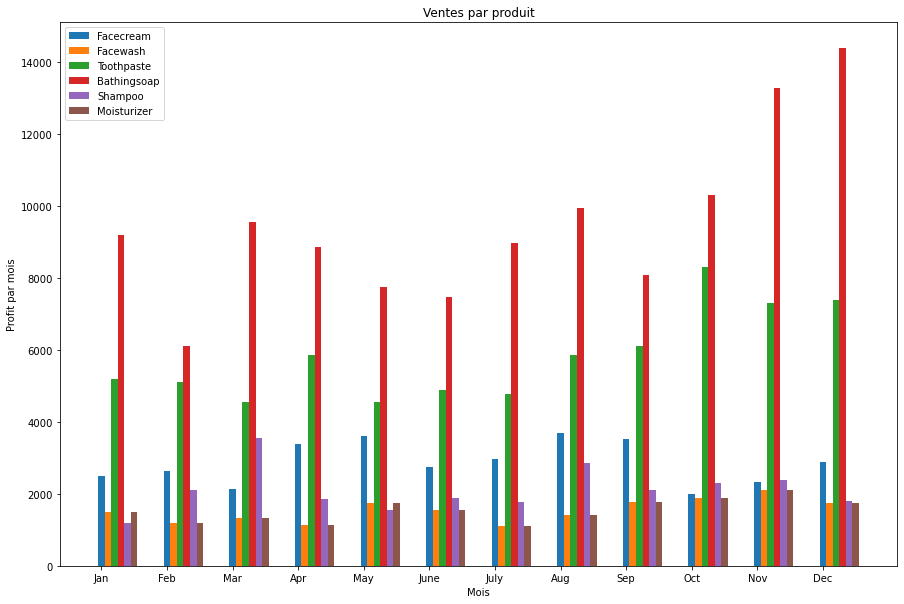

In [486]:
bar_width = 0.10
index = np.arange(df.month_number_rename.size)

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

plt.bar(index, df.facecream, bar_width,align='center', label="Facecream")
plt.bar(index + bar_width, df.facewash, bar_width,align='center', label="Facewash")
plt.bar(index + 2*bar_width , df.toothpaste, bar_width,align='center', label="Toothpaste")
plt.bar(index + 3*bar_width , df.bathingsoap, bar_width,align='center', label="Bathingsoap")
plt.bar(index + 4*bar_width , df.shampoo, bar_width,align='center', label="Shampoo")
plt.bar(index + 5*bar_width , df.moisturizer, bar_width,align='center', label="Moisturizer")

plt.xlabel('Mois')
plt.ylabel('Profit par mois')
plt.title('Ventes par produit')
plt.xticks(range(0,len(df.month_number_rename)), df.month_number_rename)
plt.legend()

plt.show()



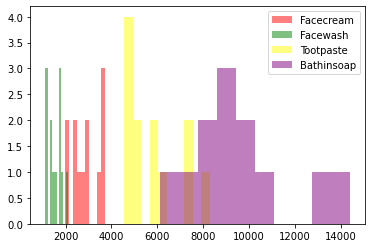

In [487]:
plt.hist(df['facecream'],
         alpha=0.5,  
         label='Facecream', 
         color='red') 
  
plt.hist(df['facewash'],  
         alpha=0.5, 
         label='Facewash', 
         color='green') 
  
plt.hist(df['toothpaste'],  
         alpha=0.5, 
         label='Tootpaste', 
         color='yellow') 
  
plt.hist(df['bathingsoap'],  
         alpha=0.5, 
         label='Bathinsoap', 
         color='purple') 
  
plt.legend(loc='upper right') 
plt.show() 

2.5 -Nous souhaitons un graphe qui donne la contribution de chaque produit dans le profit total (sur l'année étudiée). Merci d'ajouter le pourcentage pour chaque produit.



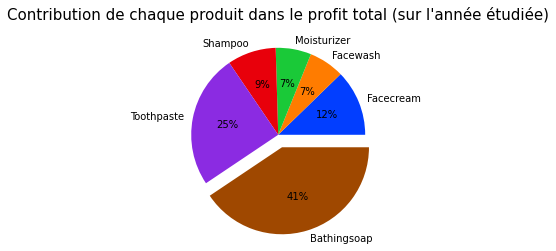

In [488]:
palette_color = sns.color_palette('bright') # Définir une palette de couleurs
explode = [0.0,0.0,0.0,0.0,0.0,0.15] # pour faire exploser la valeur la plus remarquable
plt.pie([df.facecream.sum(), df.facewash.sum(), df.moisturizer.sum(), 
        df.shampoo.sum(), df.toothpaste.sum(), df.bathingsoap.sum()], 
        labels = ["Facecream", "Facewash", "Moisturizer", "Shampoo", "Toothpaste", "Bathingsoap"],
       autopct ="%1.0f%%",explode = explode,colors= palette_color)

plt.title("Contribution de chaque produit dans le profit total (sur l'année étudiée)",fontsize=15)

plt.show()


In [489]:
""""
pct1 = (df.facecream / df.total_profit)*100
pct2 = (df.facewash / df.total_profit)*100
pct4 = (df.bathingsoap/ df.total_profit)*100
pct5 = (df.shampoo / df.total_profit)*100
pct6 = (df.moisturizer/ df.total_profit)*100

plt.bar(index, pct1, bar_width,align='center', label="Facecream")
plt.bar(index + bar_width, pct2, bar_width,align='center', label="Facewash")
plt.bar(index + 2*bar_width , pct3, bar_width,align='center', label="Toothpaste")
plt.bar(index + 3*bar_width , pct4, bar_width,align='center', label="Bathingsoap")
plt.bar(index + 4*bar_width , pct5, bar_width,align='center', label="Shampoo")
plt.bar(index + 5*bar_width , pct6, bar_width,align='center', label="Moisturizer")

plt.xlabel('Mois')
plt.ylabel('Profit par mois')
plt.title('Ventes par produit')
plt.xticks(range(0,len(df.month_number_rename)), df.month_number_rename)
plt.legend()

plt.show()
"""


'"\npct1 = (df.facecream / df.total_profit)*100\npct2 = (df.facewash / df.total_profit)*100\npct4 = (df.bathingsoap/ df.total_profit)*100\npct5 = (df.shampoo / df.total_profit)*100\npct6 = (df.moisturizer/ df.total_profit)*100\n\nplt.bar(index, pct1, bar_width,align=\'center\', label="Facecream")\nplt.bar(index + bar_width, pct2, bar_width,align=\'center\', label="Facewash")\nplt.bar(index + 2*bar_width , pct3, bar_width,align=\'center\', label="Toothpaste")\nplt.bar(index + 3*bar_width , pct4, bar_width,align=\'center\', label="Bathingsoap")\nplt.bar(index + 4*bar_width , pct5, bar_width,align=\'center\', label="Shampoo")\nplt.bar(index + 5*bar_width , pct6, bar_width,align=\'center\', label="Moisturizer")\n\nplt.xlabel(\'Mois\')\nplt.ylabel(\'Profit par mois\')\nplt.title(\'Ventes par produit\')\nplt.xticks(range(0,len(df.month_number_rename)), df.month_number_rename)\nplt.legend()\n\nplt.show()\n'

2.6.- D'abord, nous souhaitons avoir un graphe pie chart qui donne la répartition des produits par catégorie. Merci d'indiquer le pourcentage par produit (nb de produits de telle catégorie / nb de produits totaux).



In [490]:
df_products = pd.read_csv("/Users/rodelin/Documents/THP/dataset_bookstore/products.csv")

In [491]:
group_cat = df_products.groupby(by='categ', as_index=False).agg({'id_prod': pd.Series.nunique})
group_cat

,categ,id_prod
0,0,2309
1,1,739
2,2,239


Text(0.5, 1.0, ' Répartion des produits par catégorie')

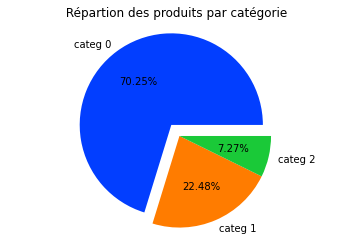

In [492]:
palette_color = sns.color_palette('bright') # Définir une palette de couleurs
explode = [0.15,0.0,0.0] # pour faire exploser la valeur la plus remarquable
plt.pie(group_cat['id_prod'],labels = ['categ 0', 'categ 1', 'categ 2'],autopct='%1.2f%%',explode = explode,colors= palette_color)
plt.axis('equal')
plt.title(" Répartion des produits par catégorie")

In [493]:
df_products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [494]:
df_transactions = pd.read_csv('/Users/rodelin/Documents/THP/dataset_bookstore/transactions.csv')

In [495]:
df_transactions.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


In [496]:
df_customers = pd.read_csv("/Users/rodelin/Documents/THP/dataset_bookstore/customers.csv")
df_customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


2.7.- Nous souhaitons un graphe qui donne l'évolution du CA pour chaque catégorie (en fonction du temps)

In [497]:
# Clean this dataset
